## Overview - Business Understanding

In this notebook, I would like to explore the educational and job satisfaction characteristics of respondents of the survey based in Nigeria. To achieve this, I will retrieve data from the Stackoverflow developer survey 2017. The questions that I am interested in asking are;

- What is their field of study
- What is their highest level of Formal Education
- What is their level of job satisfaction
- What is their level of career satisfaction



## Data Understanding

Now we are going to import the data obtained from the developers survey and convert it into a dataframe

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
%matplotlib inline

df = pd.read_csv('survey-results-public.csv')
df.head()


,Respondent,Professional,ProgramHobby,Country,University,EmploymentStatus,FormalEducation,MajorUndergrad,HomeRemote,CompanySize,...,StackOverflowMakeMoney,Gender,HighestEducationParents,Race,SurveyLong,QuestionsInteresting,QuestionsConfusing,InterestedAnswers,Salary,ExpectedSalary
0,1,Student,"Yes, both",United States,No,"Not employed, and not looking for work",Secondary school,NaN,NaN,NaN,...,Strongly disagree,Male,High school,White or of European descent,Strongly disagree,Strongly agree,Disagree,Strongly agree,NaN,NaN
1,2,Student,"Yes, both",United Kingdom,"Yes, full-time",Employed part-time,Some college/university study without earning ...,Computer science or software engineering,"More than half, but not all, the time",20 to 99 employees,...,Strongly disagree,Male,A master's degree,White or of European descent,Somewhat agree,Somewhat agree,Disagree,Strongly agree,NaN,37500.0
2,3,Professional developer,"Yes, both",United Kingdom,No,Employed full-time,Bachelor's degree,Computer science or software engineering,"Less than half the time, but at least one day ...","10,000 or more employees",...,Disagree,Male,A professional degree,White or of European descent,Somewhat agree,Agree,Disagree,Agree,113750.0,NaN
3,4,Professional non-developer who sometimes write...,"Yes, both",United States,No,Employed full-time,Doctoral degree,A non-computer-focused engineering discipline,"Less than half the time, but at least one day ...","10,000 or more employees",...,Disagree,Male,A doctoral degree,White or of European descent,Agree,Agree,Somewhat agree,Strongly agree,NaN,NaN
4,5,Professional developer,"Yes, I program as a hobby",Switzerland,No,Employed full-time,Master's degree,Computer science or software engineering,Never,10 to 19 employees,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Let's look at the questions asked during the survey

In [2]:
df2 = pd.read_csv('survey-results-schema.csv')

df2.head()

,Column,Question
0,Respondent,Respondent ID number
1,Professional,Which of the following best describes you?
2,ProgramHobby,Do you program as a hobby or contribute to ope...
3,Country,In which country do you currently live?
4,University,"Are you currently enrolled in a formal, degree..."


Now lets explore the data to gain more insights into it

In [3]:
num_rows = df.shape[0]
num_cols = df.shape[1]

print(num_rows, num_cols)

51392 154


We see that there are 51392 rows and 154 columns in the developers survey

In [4]:
no_nulls = set(df.columns[df.isnull().any() == 0])

no_nulls

{'Country',
 'EmploymentStatus',
 'FormalEducation',
 'Professional',
 'ProgramHobby',
 'Respondent',
 'University'}

We see that there are 7 columns without missing values

{"Bachelor's degree", 'Professional degree', 'Doctoral degree', 'Primary/elementary school', "Some college/university study without earning a bachelor's degree", 'Secondary school', 'I never completed any formal education', 'I prefer not to answer', "Master's degree"}


Text(0.5, 1.0, 'What type of education do you possess')

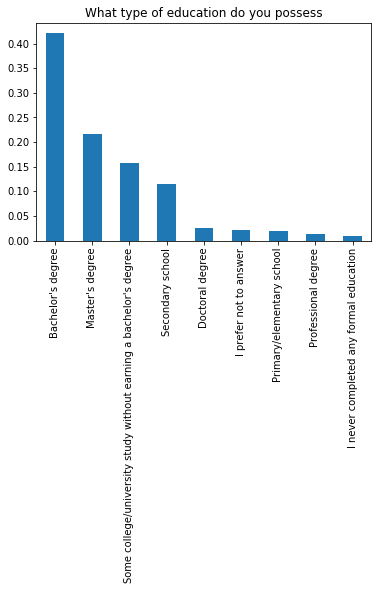

In [6]:
print(set(df.FormalEducation))

f_ed = df.FormalEducation.value_counts()

(f_ed/num_rows).plot(kind='bar')
plt.title("What type of education do you possess")

From the chart, we see that about 42% of the respondents indicated that they possess bachelor's degrees; this is the most amongst all the other options

Text(0.5, 1.0, 'What Gender are you')

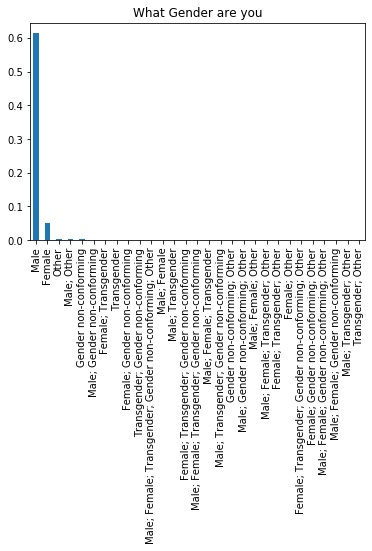

In [7]:
g_val = df.Gender.value_counts()

(g_val/num_rows).plot(kind='bar')
plt.title('What Gender are you')

About 60% of the respondents identified themselves as Male

In [8]:
pd.DataFrame(df.query("Professional == 'Professional developer' and (Gender == 'Male' or Gender == 'Female')").groupby(['Gender', 'FormalEducation']).mean()['Salary'])

Salary
Gender FormalEducation                                                 
Female Bachelor's degree                                   60040.908291
       Doctoral degree                                     90623.768006
       I never completed any formal education                       NaN
       I prefer not to answer                              13255.786387
       Master's degree                                     56210.867588
       Primary/elementary school                           32258.064516
       Professional degree                                 45458.307618
       Secondary school                                    41110.162320
       Some college/university study without earning a...  48116.699754
Male   Bachelor's degree                                   57413.518034
       Doctoral degree                                     76872.602904
       I never completed any formal education              43090.588914
       I prefer not to answer                              37629.362623
       Master's degree                                     59156.503938
       Primary/elementary school                           63777.121965
       Professional degree                                 40901.083005
       Secondary school                                    41353.206724
       Some college/university study without earning a...  57262.911063

Women with Bachelor's degrees and Doctoral degrees indicated higher average salaries than Men with similar degrees

In [9]:
set(df2.Column) #I want to obtain all the values under the second dataframe column

{'AnnoyingUI',
 'AssessJobCommute',
 'AssessJobCompensation',
 'AssessJobDept',
 'AssessJobDiversity',
 'AssessJobExp',
 'AssessJobFinances',
 'AssessJobIndustry',
 'AssessJobLeaders',
 'AssessJobOffice',
 'AssessJobProduct',
 'AssessJobProfDevel',
 'AssessJobProjects',
 'AssessJobRemote',
 'AssessJobRole',
 'AssessJobTech',
 'AuditoryEnvironment',
 'BoringDetails',
 'BuildingThings',
 'CareerSatisfaction',
 'ChallengeMyself',
 'ChangeWorld',
 'CheckInCode',
 'ClickyKeys',
 'CollaborateRemote',
 'CompanySize',
 'CompanyType',
 'CompetePeers',
 'Country',
 'CousinEducation',
 'Currency',
 'DeveloperType',
 'DifficultCommunication',
 'DiversityImportant',
 'EducationImportant',
 'EducationTypes',
 'EmploymentStatus',
 'EnjoyDebugging',
 'EquipmentSatisfiedCPU',
 'EquipmentSatisfiedMonitors',
 'EquipmentSatisfiedRAM',
 'EquipmentSatisfiedRW',
 'EquipmentSatisfiedStorage',
 'ExCoder10Years',
 'ExCoderActive',
 'ExCoderBalance',
 'ExCoderBelonged',
 'ExCoderNotForMe',
 'ExCoderReturn',
 'Ex

In [10]:
df.Country.unique() #I want to view all the unique values under the country column in the first dataframe

array(['United States', 'United Kingdom', 'Switzerland', 'New Zealand',
       'Poland', 'Colombia', 'France', 'Canada', 'Germany', 'Greece',
       'Brazil', 'Israel', 'Italy', 'Belgium', 'India', 'Chile',
       'Croatia', 'Argentina', 'Netherlands', 'Denmark', 'Ukraine',
       'Sri Lanka', 'Malaysia', 'Finland', 'Turkey', 'Spain', 'Austria',
       'Mexico', 'Russian Federation', 'Bulgaria', 'Uruguay', 'Estonia',
       'Iran', 'Bangladesh', 'Sweden', 'Lithuania', 'Paraguay', 'Romania',
       'Costa Rica', 'Serbia', 'Slovenia', 'United Arab Emirates',
       'Tunisia', 'Kenya', 'El Salvador', 'Norway', 'Dominican Republic',
       'Belarus', 'Portugal', 'Czech Republic', 'Albania',
       'I prefer not to say', 'South Africa', 'Uzbekistan', 'Moldavia',
       'Ireland', 'Nepal', 'Pakistan', 'Slovak Republic', 'Hungary',
       'Egypt', 'Australia', 'Japan', 'South Korea', 'Rwanda',
       'Luxembourg', 'Kazakhstan', 'Bolivia', 'Vietnam', 'Somalia',
       'Saudi Arabia', 'Ethiopia

**We are interested in extracting data for developers who live in Nigeria, and work as developers by profession or write code sometimes as part of their job. Let's see which questions asked in the survey can guide us to our required data**

In [11]:
list(df2[df2.Column == 'Country']['Question'])

['In which country do you currently live?']

In [12]:
list(df2[df2.Column == 'Professional']['Question'])

['Which of the following best describes you?']

In [13]:
df['Professional'].unique()

array(['Student', 'Professional developer',
       'Professional non-developer who sometimes writes code',
       'Used to be a professional developer', 'None of these'],
      dtype=object)

In [14]:
list(df2[df2.Column=='MajorUndergrad']['Question'])

["Which of the following best describes your main field of study (aka 'major') in college or university/for your undergraduate studies?"]

In [15]:
list(df2[df2.Column=='FormalEducation']['Question'])

["Which of the following best describes the highest level of formal education that you've completed?"]

In [16]:
list(df2[df2.Column=='JobSatisfaction']['Question'])

['Job satisfaction rating']

In [17]:
list(df2[df2.Column=='CareerSatisfaction']['Question'])

['Career satisfaction rating']

Next, we'll create a dataframe df3 which would contain the survey results from Nigeria only. Including those that identify as Male or Female and declare that they are a "Professional Developer" or "Professional non-developer who sometimes writes code"

In [18]:
df3 = df[(df.Country == 'Nigeria') & ((df.Gender == 'Male') | (df.Gender == 'Female')) & ((df.Professional == 'Professional developer') | (df.Professional == 'Professional non-developer who sometimes writes code'))]

df3.head()

,Respondent,Professional,ProgramHobby,Country,University,EmploymentStatus,FormalEducation,MajorUndergrad,HomeRemote,CompanySize,...,StackOverflowMakeMoney,Gender,HighestEducationParents,Race,SurveyLong,QuestionsInteresting,QuestionsConfusing,InterestedAnswers,Salary,ExpectedSalary
1581,1582,Professional developer,"Yes, I program as a hobby",Nigeria,No,Employed full-time,Master's degree,Computer science or software engineering,All or almost all the time (I'm full-time remote),100 to 499 employees,...,Disagree,Male,A master's degree,Black or of African descent,Somewhat agree,Agree,Strongly disagree,Agree,4117.553614,NaN
1669,1670,Professional developer,"Yes, both",Nigeria,No,Employed full-time,Bachelor's degree,Computer science or software engineering,"Less than half the time, but at least one day ...",20 to 99 employees,...,Disagree,Male,A bachelor's degree,Black or of African descent,Strongly agree,Somewhat agree,Disagree,Agree,NaN,NaN
3158,3159,Professional developer,"Yes, I program as a hobby",Nigeria,No,Employed full-time,Bachelor's degree,Computer science or software engineering,A few days each month,20 to 99 employees,...,Disagree,Male,A doctoral degree,Black or of African descent,Somewhat agree,Somewhat agree,Strongly disagree,Strongly agree,2668.784750,NaN
3751,3752,Professional developer,No,Nigeria,No,Employed full-time,Bachelor's degree,Computer engineering or electrical/electronics...,A few days each month,20 to 99 employees,...,NaN,Male,A bachelor's degree,Black or of African descent,Strongly agree,Disagree,Disagree,Strongly agree,NaN,NaN
4538,4539,Professional developer,"Yes, both",Nigeria,No,I prefer not to say,Some college/university study without earning ...,Computer science or software engineering,NaN,NaN,...,Disagree,Male,"Some college/university study, no bachelor's d...",Black or of African descent,Agree,Somewhat agree,Disagree,Disagree,NaN,NaN


In [20]:
print(df3.shape[0])
print(df3.shape[1])

75
154


There are 75 rows and 154 columns in the new dataframe

In [21]:
len(df3[df3['Gender']=='Female'])

4

There are 4 respondents that identify as female from Nigeria in the new dataframe

In [22]:
percentage_women= len(df3[df3['Gender']=='Female'])/len(df3)*100
print(round(percentage_women,1))

5.3


5.3 percent of respondents identify as female in dataframe

In [23]:
len(df3[df3['Gender']=='Male'])

71

71 respondents identify as Male from Nigeria in the new dataframe

In [24]:
percentage_men= len(df3[df3['Gender']=='Male'])/len(df3)*100
print(round(percentage_men,1))

94.7


**Data Preparation**

We will subset df3 to include only the columns that interest us

In [25]:
col_list = ['MajorUndergrad', 'FormalEducation', 'JobSatisfaction', 'CareerSatisfaction', 'Gender']

df_new = df3[col_list]
df_new.head()

,MajorUndergrad,FormalEducation,JobSatisfaction,CareerSatisfaction,Gender
1581,Computer science or software engineering,Master's degree,8.0,8.0,Male
1669,Computer science or software engineering,Bachelor's degree,6.0,6.0,Male
3158,Computer science or software engineering,Bachelor's degree,3.0,2.0,Male
3751,Computer engineering or electrical/electronics...,Bachelor's degree,5.0,3.0,Male
4538,Computer science or software engineering,Some college/university study without earning ...,NaN,6.0,Male


Let's get a graphical view of the number of missing values in the new dataframe

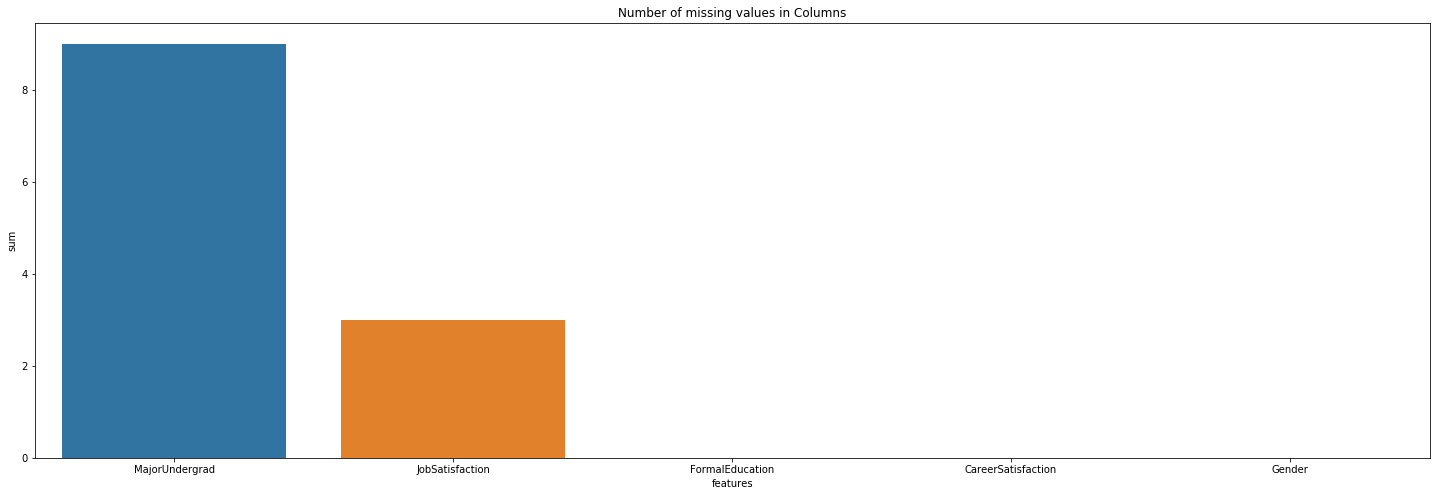

In [26]:
plt.figure(figsize=(25,8))
plt.title('Number of missing values in Columns')
missing_count = pd.DataFrame(df_new.isnull().sum(), columns=['sum']).sort_values(by=['sum'], ascending=False).head(20).reset_index()
missing_count.columns = ['features', 'sum']

sns.barplot(x='features', y='sum', data=missing_count)
plt.show()

MajorUndergrad column has 9 missing values, JobSatisfaction column has 3 missing values. Since we will not be performing any modelling on the data, we will ignore these missing values and continue our analysis.

# Analysis

**What is your main field of study?**

We will plot separate graphs for both genders to identify the percentage that declared for each field of study 

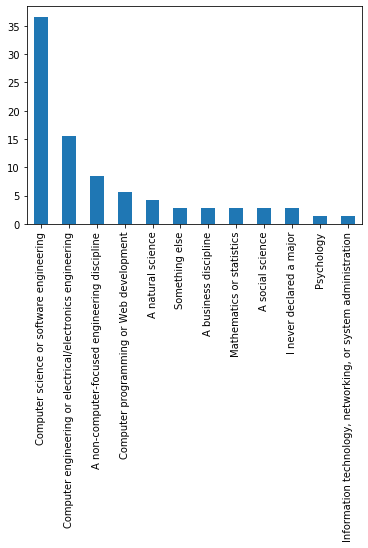

In [27]:
((df_new[df_new['Gender'] == 'Male']['MajorUndergrad'].value_counts()/len((df_new[df_new['Gender'] == 'Male']['MajorUndergrad']))*100)).plot(kind='bar')

36% of male respondents declared computer science or software engineering as their major, about 16% declared computer engineering or electrical/electronics engineering as their major.

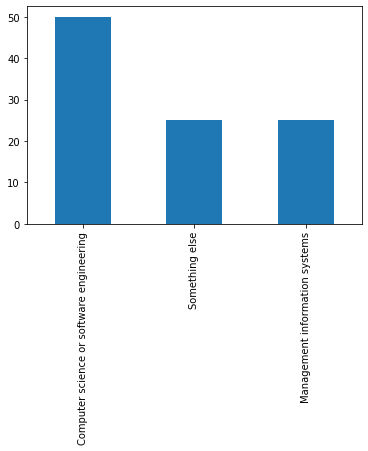

In [28]:
((df_new[df_new['Gender'] == 'Female']['MajorUndergrad'].value_counts()/len((df_new[df_new['Gender'] == 'Female']['MajorUndergrad']))*100)).plot(kind='bar')

50% of females declared computer science or software engineering as their major. 

From the charts above, we see that the most popular degree for developers in both men and women is Computer Science, women on the other hand, have a propensity to come from 'other' fields as opposed to men who are majorly in the traditional majors.

**"Which of the following best describes the highest level of formal education that you've completed?"**

Next we are going to check the highest level of education of both genders in Nigeria.

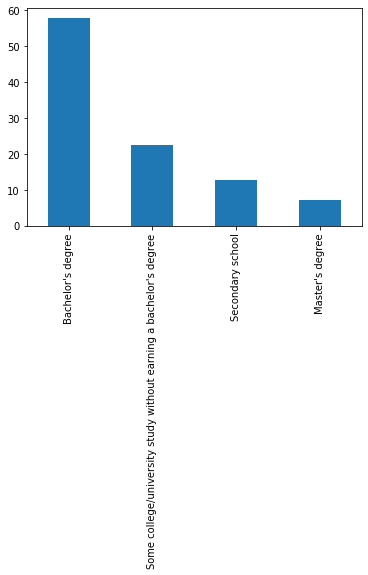

In [29]:
((df_new[df_new['Gender'] == 'Male']['FormalEducation'].value_counts()/len((df_new[df_new['Gender'] == 'Male']['FormalEducation']))*100)).plot(kind='bar')

About 58% of male respondents declared that bachelor's degree was their highest level of education while about 22% indicated that they had some university experience without a bachelor's degree

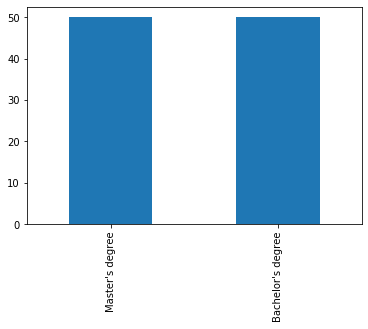

In [30]:
((df_new[df_new['Gender'] == 'Female']['FormalEducation'].value_counts()/len((df_new[df_new['Gender'] == 'Female']['FormalEducation']))*100)).plot(kind='bar')

50% of female respondents declared for both Master's degree and bachelor's degree as their highest level of education. 

This could signify that women in Nigeria feel the need to be better educated before becoming developers as opposed to men.

**What is your level of Job satisfaction?**

Next we will find out which gender declares a higher average job satisfaction level than the other.

In [31]:
df_new.groupby(['Gender']).mean()['JobSatisfaction'].sort_values()

Gender
Female    3.750000
Male      5.985294
Name: JobSatisfaction, dtype: float64

From the results, it can be seen that male respondents indicated a higher average level of Job satisfaction. Now this result may not be accurate for all the developers in Nigeria because as we can recall, there are only 4 respondents that identify as female and there are 71 that identify as male.

**What is your level of career satisfaction?**

Finally, we will try to determine the average level of career satisfaction between both genders

In [32]:
df_new.groupby(['Gender']).mean()['CareerSatisfaction'].sort_values()

Gender
Female    6.750000
Male      7.126761
Name: CareerSatisfaction, dtype: float64

From the results, we can say that both genders indicate high levels of career satisfaction with the male respondents just edging it